## Lab 1


In [52]:
#Zaimportowane moduły
import numpy as np
import timeit
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt




1.Program sumujący 10^7 liczb o stałej wartości

In [53]:
def sum(v32,v64,rand,get_plot=False,count=10**7):

    expected = rand*count
    d = []
    # print(great_val)
    sum_32 = np.float32(0)
    sum_64 = np.float64(0)
    for i in range(count):
        if (i%25000 == 0 and get_plot):
            abs_val = abs(sum_32 - sum_64)
            percentage = abs_val / expected * 100
            d.append(percentage)
        sum_32 += v32
        sum_64 += v64

    if(get_plot):
        sns.lineplot(data=d)
        plt.show()

    #Wypisanie błędu dla float32
    abs_val = abs(sum_32 - expected)
    percentage = abs_val/expected * 100
    print("Błąd bezwzględny: " + str(abs_val))
    print("Błąd względny: " + str(percentage) + "%")

Przykładowe wywołanie

In [54]:
rand = 0.53125
# rand = np.random.random(1)[0]
v32 = np.float32(rand)
v64 = np.float64(rand)
sum(v32,v64,rand,False)


Błąd bezwzględny: 281659.5
Błąd względny: 5.301825882352941%


Bląd bezwzględny jest wyjątkowo duży, związane jest to z zapisem liczb w systemie
Float32 ma dwukrotnie mniej miejsc liczb po przecinku niż Float64 przez co te liczby
są wytracane - do coraz większej liczby dodawana jest ta sama.

Błąd względny:


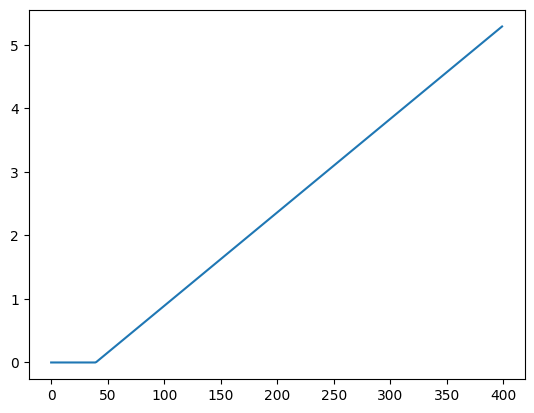

Błąd bezwzględny: 281659.5
Błąd względny: 5.301825882352941%


In [55]:
rand = 0.53125
# rand = np.random.random(1)[0]
v32 = np.float32(rand)
v64 = np.float64(rand)
sum(v32,v64,rand,True)

Na wykresie widzimy, że początkowo sumowane liczby były mocno zbliżone, nie traciliśmy
na dokładności, natomiast dalej błąd względny rosnął liniowo.
Różnica między pręcyzjami stale rosła tak samo, więc błąd względny również.
Można więc stwierdzić, że problem jest, gdy bardzo duża liczba dodawana jest od bardzo małej

Algorytm rekurencyjny:


In [56]:
def recursive(v32,v64,rand ,count = 10**7):
    expected = rand*count
    def recursive_sum(v,c,pos=0):
        if c == 1:
            return v
        else:
            return recursive_sum(v,c//2,pos) + recursive_sum(v,c-c//2,pos+c//2)

    sum_32 = recursive_sum(v32,count)
    abs_val = abs(sum_32 - expected)
    percentage = abs_val / expected * 100
    print("Błąd bezwzględny: " + str(abs_val))
    print("Błąd względny: " + str(percentage) + "%")


Przykładowe wywołanie algoerytmu rekurencyjnego:


In [57]:
rand = 0.53125
# rand = np.random.random(1)[0]
v32 = np.float32(rand)
v64 = np.float64(rand)
recursive(v32,v64,rand)

Błąd bezwzględny: 0.0
Błąd względny: 0.0%


Błąd względny zmalał, a nawet nie ma w tym przypadku praktycznie żadnego błedu,
jest to związane z tym, że liczby które są dodawane są bardzo mocno zbliżone do siebie lub też takie same.

Przykładowe czasy:

-Rekurencyjny jest wolniejszy mimo wszystko

In [58]:
rand = 0.53125
# rand = np.random.random(1)[0]
v32 = np.float32(rand)
v64 = np.float64(rand)
print("Zwykłe sumowanie")
print(f"Czas: {timeit.timeit(lambda: sum(v32,v64,rand,False),number=1)}s")
print("Rekurencyjne")
print(f"Czas: {timeit.timeit(lambda: recursive(v32,v64,rand),number=1)}s")

Zwykłe sumowanie
Błąd bezwzględny: 281659.5
Błąd względny: 5.301825882352941%
Czas: 1.5268973329948494s
Rekurencyjne
Błąd bezwzględny: 0.0
Błąd względny: 0.0%
Czas: 2.1646402920014225s


Przykładowe dane z niezerowym błędem dla algorytmu rekurencyjnego


In [59]:
rand = 0.666
# rand = np.random.random(1)[0]
v32 = np.float32(rand)
v64 = np.float64(rand)
recursive(v32,v64,rand)

rand = 0.747842
# rand = np.random.random(1)[0]
v32 = np.float32(rand)
v64 = np.float64(rand)
recursive(v32,v64,rand)


Błąd bezwzględny: 1.0
Błąd względny: 1.5015015015015016e-05%
Błąd bezwzględny: 0.5
Błąd względny: 6.685904241805087e-06%


Są to niezerowe jak widzimy, aczkolwiek błąd jest bardzo mały.

Implementacja algorytmu Khana:

In [60]:
def Khan(v32,v64,rand,count = 10**7):
    expected = rand*count
    sum_32 = np.float32(0)
    err = np.float32(0)
    for i in range(count):
        y = v32 - err
        temp = sum_32 + y
        err = (temp-sum_32)-y
        sum_32 = temp

    abs_val = abs(sum_32 - expected)
    percentage = abs_val/expected * 100
    print("Błąd bezwzględny: " + str(abs_val))
    print("Błąd względny: " + str(percentage)+"%")

Przykładowe wywołanie - te same dane:


In [61]:
rand = 0.53125
v32 = np.float32(rand)
v64 = np.float64(rand)
Khan(v32,v64,rand)

Błąd bezwzględny: 0.0
Błąd względny: 0.0%


Własności numeryczne są dużo lepsze, głównie przez zmienną err, same wywołanie
funkcji jest proste tworzy wartość temp, która sumuje wartości, a następnie wyznaczamy wartość
err, która wyznacza błąd sumowania (odjęcie od temp wartości dodanej), no i na koniec odejmujemy od sumy ten błąd
aby otrzymać poprawną wartość. Przez zastosowanie takiego odejmowania błędu dodawania liczb,
możemy otrzymać lepsze wartości zbliżone do rzeczywistych.

Porównanie czasowe funkcji


In [62]:
rand = 0.747842
v32 = np.float32(rand)
v64 = np.float64(rand)
print("Rekurencja")
print(f"Czas: {timeit.timeit(lambda: recursive(v32,v64,rand),number=1)}s")
print("Khan")
print(f"Czas: {timeit.timeit(lambda: Khan(v32,v64,rand),number=1)}s")

Rekurencja
Błąd bezwzględny: 0.5
Błąd względny: 6.685904241805087e-06%
Czas: 2.068048083994654s
Khan
Błąd bezwzględny: 0.0
Błąd względny: 0.0%
Czas: 2.290582292000181s


Rekurencja jest mocno zbliżona czasowo do algorytmu Khana, natomiast wartości
są bardzo dobre (brak błędu względnego)

Sumy częściowe:

In [63]:

#formuły
def formula_sum(k,s,flag=True):
    if flag:
        return np.float32(1/ k ** s)
    return np.float64(1/ k ** s)
def formula_dirichlet(k,s,flag=True):
    if flag:
        return np.float32((-1) ** (k-1) * 1/ k ** s)
    return np.float64((-1) ** (k-1) * 1/ k ** s)

def sums(form=True):
    #tablice z danymi
    s = [2,3.6667,5,7.2,10]
    n = [50,100,200,500,1000]
    table_for_df = []
    for i in range(len(s)):
        for j in range(len(n)):

            sum_32_normal = np.float32(0)
            sum_32_descending = np.float32(0)
            sum_64_normal = np.float64(0)
            sum_64_descending = np.float64(0)

            for k in range(1,n[j]+1):
                if form:
                    sum_32_normal += formula_sum(k,s[i])
                    sum_64_normal += formula_sum(k,s[i],False)
                else:
                    sum_32_normal += formula_dirichlet(k, s[i])
                    sum_64_normal += formula_dirichlet(k, s[i], False)
            for k in range(n[j],0,-1):
                if form:
                    sum_32_descending += formula_sum(k,s[i])
                    sum_64_descending += formula_sum(k,s[i], False)
                else:
                    sum_32_descending += formula_dirichlet(k, s[i])
                    sum_64_descending += formula_dirichlet(k, s[i], False)
            forward_error = abs(sum_32_normal-sum_64_normal)/sum_64_normal * 100
            backward_error = abs(sum_32_descending - sum_64_descending) / sum_64_descending * 100
            table_info = [s[i],n[j]]
            table_info.append(sum_32_normal)
            table_info.append(forward_error)
            table_info.append(sum_32_descending)
            table_info.append(backward_error)
            table_info.append(sum_32_normal == sum_32_descending)
            table_info.append(sum_64_normal == sum_64_descending)
            if (forward_error < backward_error):
                table_info.append("forward")
            elif (forward_error > backward_error):
                table_info.append("backward")
            else:
                table_info.append("both")
            table_for_df.append(table_info)

    df = pd.DataFrame(data=table_for_df, columns=['s','n','forward sum','forward error','backward sum','backward error','is_equal','is_equal64','best_method'])
    return df




Wywołanie tej funkcji dla sum częściowych:
(Użyta funkcja head - pierwsze 5 elementów dataframe'a)

In [64]:
df = sums(True)
df.head()


,s,n,forward sum,forward error,backward sum,backward error,is_equal,is_equal64,best_method
0,2.0,50,1.625133,0.000011,1.625133,3.303254e-06,False,False,backward
1,2.0,100,1.634984,0.000007,1.634984,1.820033e-07,False,False,backward
2,2.0,200,1.639947,0.000009,1.639946,5.200848e-06,False,False,backward
3,2.0,500,1.642936,0.000005,1.642936,4.517989e-06,True,False,forward
4,2.0,1000,1.643935,0.000017,1.643934,4.768137e-06,False,False,backward


Wywołanie dla funkcji dirichleta:

In [65]:
df = sums(False)
df.head()

,s,n,forward sum,forward error,backward sum,backward error,is_equal,is_equal64,best_method
0,2.0,50,0.822271,0.000005,0.822271,0.000002,False,False,backward
1,2.0,100,0.822417,0.000004,0.822417,0.000004,True,False,backward
2,2.0,200,0.822455,0.000012,0.822455,0.000003,False,False,backward
3,2.0,500,0.822465,0.000039,0.822465,0.000003,False,False,backward
4,2.0,1000,0.822467,0.000038,0.822467,0.000002,False,False,backward


Możemy zauważyć, że liczby delikatnie się różnią przy ostatnich cyfrach po przecinku, ale mimo to,
metoda sumowania ma znaczenie, ponieważ momentami błąd względny bedzie większy lub mniejszy.
W większości przypadków najlepszą metodą okazała się metoda sumowania w tył.
Błąd obliczeń jest bardzo mały, ale mimo to istnieje, czasami wynik jest taki sam
w zalezności czy to metoda w przód czy w tył, natomiast błąd względny się różni, może to byc
związane z tym, że wartości dokładne (flot64) się delikatnie różnią

Błędy zaokrągleń i odwzorowanie logistyczne:


In [66]:
def generate_x_value(r,x_n,flag = False):
    if flag:
        return np.float64(r*x_n*(1-x_n))
    return np.float32(r*x_n*(1-x_n))
def function_1(x0):
    n = 10**3
    r_s = [np.float32(i) for i in np.arange(2,4,0.01)]
    for_df = []
    for r in r_s:
        r = np.float32(r)
        x_n = np.float32(x0)
        for i in range(n):
            x_n = generate_x_value(r,x_n)
            if i >= n-200 :
                for_df.append([r,x_n])

    df = pd.DataFrame(data=for_df,columns=['r','x'])
    sns.scatterplot(data=df,x="r",y="x",s = 3)

Przykładowe wywołania (diagram bifurkacyjny):

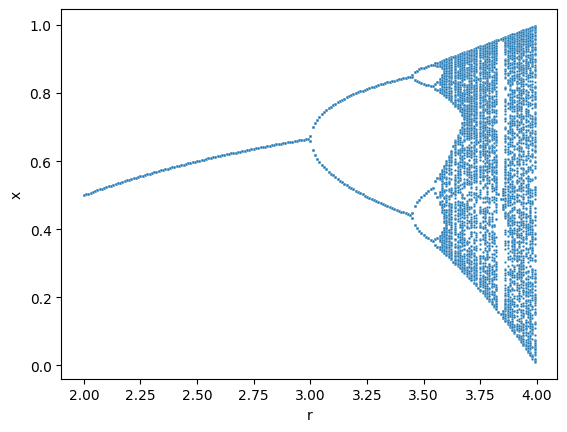

In [67]:
function_1(0.4)

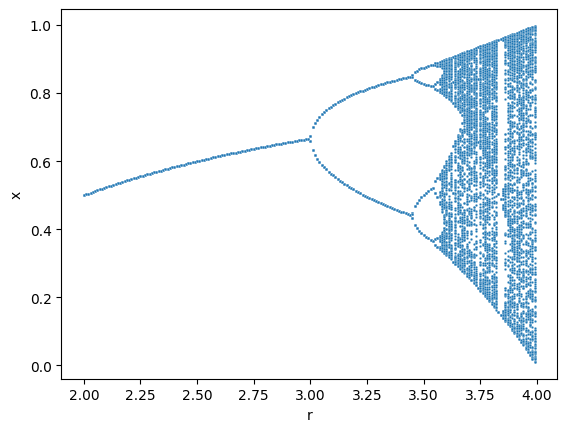

In [68]:
function_1(0.7)

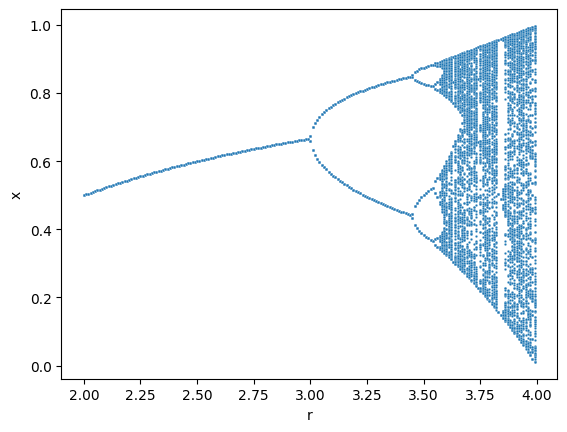

In [69]:
function_1(0.3)

We wszystkich przypadkach wartości zmierzają do tych samych liczb, niezależnie od x0,
moga się delikatnie różnić w jakimś miejscu po przecinku te punkty co jest związane z
wyliczaniem tych wartości, aczkolwiek wykresy są bardzo podobne.

In [70]:
def function_2(r,flag=False,x0=0.6,n=10**2):
    x_n = np.float32(x0)
    r = np.float32(r)
    if flag:
        x_n = np.float64(x0)
        r = np.float64(r)
    x_values = [x0]
    for i in range(n):
        x_n = generate_x_value(r,x_n,flag)
        x_values.append(x_n)
    sns.lineplot(data=x_values)

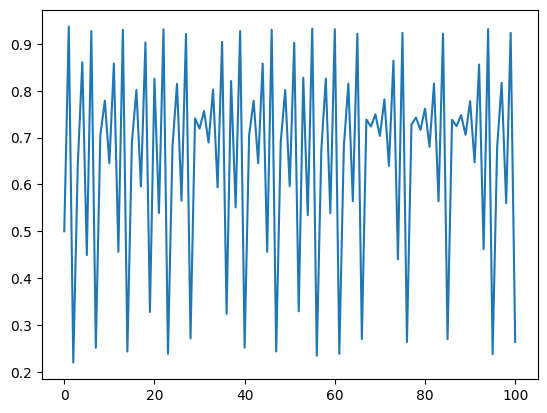

In [71]:
#False means without double precision
function_2(3.75,False,0.5)

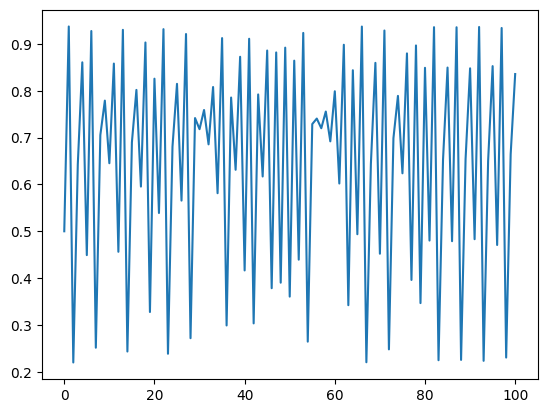

In [72]:
function_2(3.75,True,0.5)

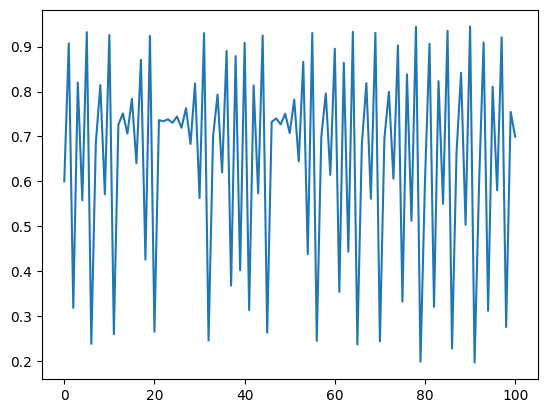

In [73]:
function_2(3.78,False)

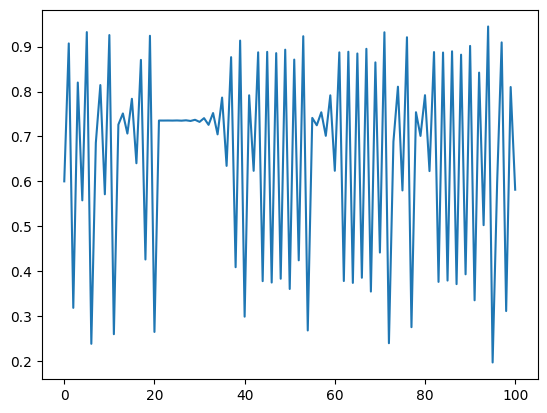

In [74]:
function_2(3.78,True)

Wyniki są bardziej dokładne, gdy korzystamy z podwójnej precyzji.
W precyzji pojedyńczej niektóre wartości mocną się różnią spowodowane jest to zaokrąglaniem
liczb przy wyliczaniu kolejnych wartości, przez co wartości bedą się rozjeżdżać miejscami
W tej samej iteracji przykładowo na powyższym wykresie, liczby róznią sie w zakresie od (0.4,0.6) przez te właśnie
zaokrąglenia liczb w zależności od precyzji przykładowo przy wyliczaniu wartości (przez zaokrąglanie) zostają
jakieś śmieci na końcu liczby,np. 0.500001 i w zalezności od precyzji ma to większe znaczenie lub mniejsze.


In [75]:
def function_3():
    n = 10**4
    r = np.float32(4)
    for_df = []
    x0_table=[i for i in np.arange(0,1,0.01)]
    for x0 in x0_table:
        x_n = np.float32(x0)
        for i in range(n):
            if(x_n == 0):
                for_df.append([x0,i])
                break
            x_n = generate_x_value(r,x_n)
    df = pd.DataFrame(data = for_df, columns = ["Initial X_0","Steps"])
    return df

In [76]:
function_3()

,Initial X_0,Steps
0,0.00,0
1,0.01,2960
2,0.02,984
3,0.03,832
4,0.04,269
...,...,...
82,0.94,3416
83,0.95,1481
84,0.96,2405
85,0.98,2645


Nie każdą wartość można wyzerować dosłownie, w tym przypadku wyzerowało 87.
Część liczb potrzebowalo dużo więcej iteracji aby móc wyzerować daną liczbe ostatecznie.
Działa to w ten sposób, że wyliczane są kolejne wartości i coraz bardziej w każdej iteracji
zbliżają się do 1/2, a koniec końców do 0, wartość poprawna zanika poprzez zaokrąglanie.
Niektóre wartości potrzebowały dużo iteracji aby się wyzerowały.
Są wyjątki takie jak 0.75, wartość zwrócona dla x0 = 0.75 jest tą samą wartością

